In [2]:
import tweepy as tw
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

import nltk
from nltk.corpus import stopwords
from textblob import Word, TextBlob

### 1. Authenticate to Twitter

In [3]:
consumer_key = ''
consumer_secret = ''
access_token = ''
access_token_secret = ''

In [4]:
auth = tw.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tw.API(auth, wait_on_rate_limit=True)

### 2. Get Tweets

In [ ]:
results = []
#Get the first 1000 items based on the search query and store it
for tweet in tw.Cursor(api.search, q='@JoeBiden').items(150):
    results.append(tweet)

In [ ]:
tweets = [{'Tweet':tweet.text, 'Timestamp':tweet.created_at} for tweet in results]

In [ ]:
tweets[149]

In [5]:
profile = "@JoeBiden"
query = tw.Cursor(api.search, q=profile, since='2020-05-16', until='2021-05-20').items(1000)
tweets = [{'Tweet':tweet.text, 'Timestamp':tweet.created_at} for tweet in query]
print(tweets)

[{'Tweet': '@iliski_yuvasi Attack Turkey, they fuck our mother @WorldBank @IMFNews @federalreserve @JoeBiden @NATO @BelgiumNATO… https://t.co/URscuDhIoO', 'Timestamp': datetime.datetime(2021, 5, 19, 23, 59, 59)}, {'Tweet': '@Wigand_Watkins @LouisvilleGun @JoeBiden @RonaldReagan Did you just sign a tweet? You know we can see who sent it right?', 'Timestamp': datetime.datetime(2021, 5, 19, 23, 59, 55)}, {'Tweet': 'RT @JoeBiden: Text your ZIP code to 438829 to find COVID-19 vaccination locations near you.', 'Timestamp': datetime.datetime(2021, 5, 19, 23, 59, 55)}, {'Tweet': 'RT @JoeBiden: We’re counting on you to roll up your sleeve, get vaccinated, and work together to change the course of this pandemic. \n\nGo t…', 'Timestamp': datetime.datetime(2021, 5, 19, 23, 59, 53)}, {'Tweet': 'RT @stuonpoint: @EmpireFiles @JoeBiden Biden is complicit if he lets this sale go through', 'Timestamp': datetime.datetime(2021, 5, 19, 23, 59, 53)}, {'Tweet': '@JoeBiden needs to be held to a higher standar

In [6]:
df = pd.DataFrame.from_dict(tweets)
df.tail(30)

,Tweet,Timestamp
970,@mrddmia @DonaldJTrumpJr @TishJames @NewYorkSt...,2021-05-19 23:33:08
971,RT @Gabby7503: @_SJPeace_ @WhiteHouse @TheDail...,2021-05-19 23:33:00
972,RT @JoeBiden: We’re counting on you to roll up...,2021-05-19 23:32:58
973,RT @NiubisRobaina: As always POLITICS and MONE...,2021-05-19 23:32:58
974,@EmpireFiles @JoeBiden merica? This is absolut...,2021-05-19 23:32:57
975,As always POLITICS and MONEY win over #Familie...,2021-05-19 23:32:56
976,RT @Chuks79158200: This is Nigeria military Fu...,2021-05-19 23:32:55
977,RT @EmpireFiles: This is the missile (JDAM) th...,2021-05-19 23:32:55
978,"RT @RichardGrenell: Warning, graphic violence:...",2021-05-19 23:32:55
979,@rieken_shane @BernardKerik @JoeBiden @CortesS...,2021-05-19 23:32:54


In [7]:
df.shape

(1000, 2)

In [8]:
trump_handle = ['DonaldTrump', 'Donald Trump', 'Donald', 'Trump', 'Trump\'s']
biden_handle = ['JoeBiden', 'Joe Biden', 'Joe', 'Biden', 'Biden\'s']

In [9]:
def identify_subject(tweet, refs):
    flag = 0 
    for ref in refs:
        if tweet.find(ref) != -1:
            flag = 1
    return flag

df['Trump'] = df['Tweet'].apply(lambda x: identify_subject(x, trump_handle)) 
df['Biden'] = df['Tweet'].apply(lambda x: identify_subject(x, biden_handle))
df.head(10)

,Tweet,Timestamp,Trump,Biden
0,"@iliski_yuvasi Attack Turkey, they fuck our mo...",2021-05-19 23:59:59,0,1
1,@Wigand_Watkins @LouisvilleGun @JoeBiden @Rona...,2021-05-19 23:59:55,0,1
2,RT @JoeBiden: Text your ZIP code to 438829 to ...,2021-05-19 23:59:55,0,1
3,RT @JoeBiden: We’re counting on you to roll up...,2021-05-19 23:59:53,0,1
4,RT @stuonpoint: @EmpireFiles @JoeBiden Biden i...,2021-05-19 23:59:53,0,1
5,@JoeBiden needs to be held to a higher standar...,2021-05-19 23:59:51,0,1
6,@JoeBiden President Joe Biden who I respect. P...,2021-05-19 23:59:50,0,1
7,@JMarie_America @EricMMatheny What President b...,2021-05-19 23:59:50,0,0
8,@ProudSocialist @JoeBiden @GreenPartyUS Holy g...,2021-05-19 23:59:49,0,1
9,RT @EmpireFiles: This is the missile (JDAM) th...,2021-05-19 23:59:46,0,1


### 3. Preprocess

In [10]:
nltk.download('stopwords')
nltk.download('wordnet')
stop_words = stopwords.words('english')
#add another layer of preprocessing
custom_stopwords = ['RT', '#PresidentialDebate']

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\geldz\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\geldz\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [11]:
def preprocess_tweets(tweet, custom_stopwords):
    processed_tweet = tweet
    processed_tweet.replace('[^\w\s]', '')
    processed_tweet = " ".join(word for word in processed_tweet.split() if word not in stop_words)
    processed_tweet = " ".join(word for word in processed_tweet.split() if word not in custom_stopwords)
    processed_tweet = " ".join(Word(word).lemmatize() for word in processed_tweet.split())
    return(processed_tweet)

df['Processed Tweet'] = df['Tweet'].apply(lambda x: preprocess_tweets(x, custom_stopwords))
df.head()

,Tweet,Timestamp,Trump,Biden,Processed Tweet
0,"@iliski_yuvasi Attack Turkey, they fuck our mo...",2021-05-19 23:59:59,0,1,"@iliski_yuvasi Attack Turkey, fuck mother @Wor..."
1,@Wigand_Watkins @LouisvilleGun @JoeBiden @Rona...,2021-05-19 23:59:55,0,1,@Wigand_Watkins @LouisvilleGun @JoeBiden @Rona...
2,RT @JoeBiden: Text your ZIP code to 438829 to ...,2021-05-19 23:59:55,0,1,@JoeBiden: Text ZIP code 438829 find COVID-19 ...
3,RT @JoeBiden: We’re counting on you to roll up...,2021-05-19 23:59:53,0,1,"@JoeBiden: We’re counting roll sleeve, get vac..."
4,RT @stuonpoint: @EmpireFiles @JoeBiden Biden i...,2021-05-19 23:59:53,0,1,@stuonpoint: @EmpireFiles @JoeBiden Biden comp...


In [12]:
print('Base review\n', df['Tweet'][0])
print('\n------------------------------------\n')
print('Cleaned and lemmatized review\n', df['Processed Tweet'][0])

Base review
 @iliski_yuvasi Attack Turkey, they fuck our mother @WorldBank @IMFNews @federalreserve @JoeBiden @NATO @BelgiumNATO… https://t.co/URscuDhIoO

------------------------------------

Cleaned and lemmatized review
 @iliski_yuvasi Attack Turkey, fuck mother @WorldBank @IMFNews @federalreserve @JoeBiden @NATO @BelgiumNATO… https://t.co/URscuDhIoO


### 4. Calculate Sentiment

In [13]:
# Calculate polarity
df['polarity'] = df['Processed Tweet'].apply(lambda x: TextBlob(x).sentiment[0])
df['subjectivity'] = df['Processed Tweet'].apply(lambda x: TextBlob(x).sentiment[1])
df[['Processed Tweet', 'Biden', 'Trump', 'polarity', 'subjectivity']].head()

,Processed Tweet,Biden,Trump,polarity,subjectivity
0,"@iliski_yuvasi Attack Turkey, fuck mother @Wor...",1,0,-0.400000,0.600000
1,@Wigand_Watkins @LouisvilleGun @JoeBiden @Rona...,1,0,0.285714,0.535714
2,@JoeBiden: Text ZIP code 438829 find COVID-19 ...,1,0,0.100000,0.400000
3,"@JoeBiden: We’re counting roll sleeve, get vac...",1,0,0.000000,0.000000
4,@stuonpoint: @EmpireFiles @JoeBiden Biden comp...,1,0,0.000000,0.000000


In [14]:
display(df[df['Trump']==1][['Trump','polarity','subjectivity']].groupby('Trump').agg([np.mean, np.max, np.min, np.median]))
df[df['Biden']==1][['Biden','polarity','subjectivity']].groupby('Biden').agg([np.mean, np.max, np.min, np.median])

polarity                  subjectivity                 
           mean amax amin median         mean amax amin median
Trump                                                         
1     -0.006001  0.8 -0.5    0.0     0.281889  1.0  0.0    0.0

polarity                  subjectivity                 
           mean amax amin median         mean amax amin median
Biden                                                         
1      0.102603  1.0 -1.0    0.0     0.209426  1.0  0.0    0.1

### 5. Visualise

In [15]:
biden = df[df['Biden']==1][['Timestamp', 'polarity']]
biden = biden.sort_values(by='Timestamp', ascending=True)
biden['MA Polarity'] = biden.polarity.rolling(10, min_periods=3).mean()

trump = df[df['Trump']==1][['Timestamp', 'polarity']]
trump = trump.sort_values(by='Timestamp', ascending=True)
trump['MA Polarity'] = trump.polarity.rolling(10, min_periods=3).mean()

In [16]:
trump.head()

,Timestamp,polarity,MA Polarity
988,2021-05-19 23:32:44,0.0000,NaN
984,2021-05-19 23:32:51,-0.0980,NaN
979,2021-05-19 23:32:54,0.2000,0.034000
970,2021-05-19 23:33:08,-0.1875,-0.021375
949,2021-05-19 23:33:41,0.0000,-0.017100


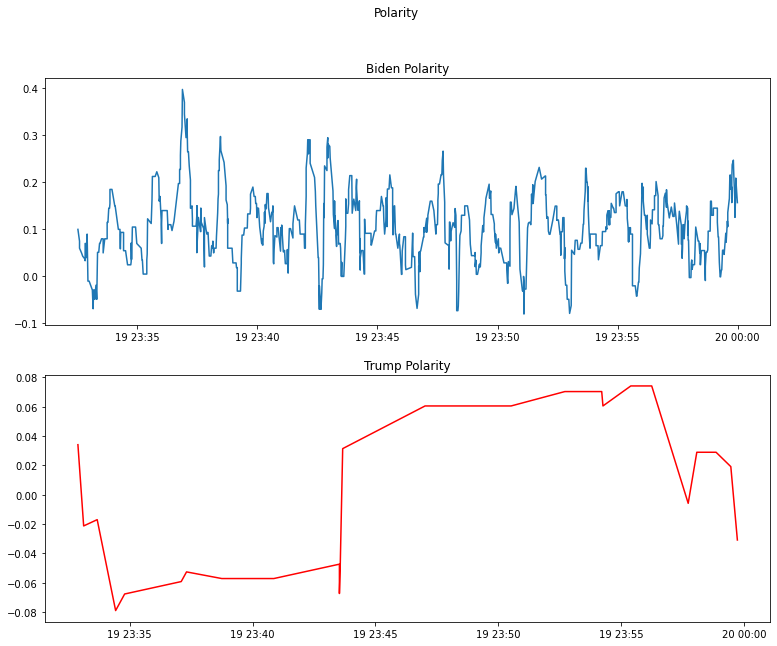

In [18]:
repub = 'red'
demo = 'blue'
fig, axes = plt.subplots(2, 1, figsize=(13, 10))

axes[0].plot(biden['Timestamp'], biden['MA Polarity'])
axes[0].set_title("\n".join(["Biden Polarity"]))
axes[1].plot(trump['Timestamp'], trump['MA Polarity'], color='red')
axes[1].set_title("\n".join(["Trump Polarity"]))

fig.suptitle("\n".join(["Polarity"]), y=0.98)

plt.show()